In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from base_values import *

In [2]:
with open('R3_coeffs.json', 'r') as f:
    R3_coeffs = json.load(f)
with open('translator_coeffs.json', 'r') as f:
    translator_coeffs = json.load(f)

df_R3_with_est = pd.read_csv('df_R3_with_est.csv')
df_translator_with_est = pd.read_csv('df_translator_with_est.csv')

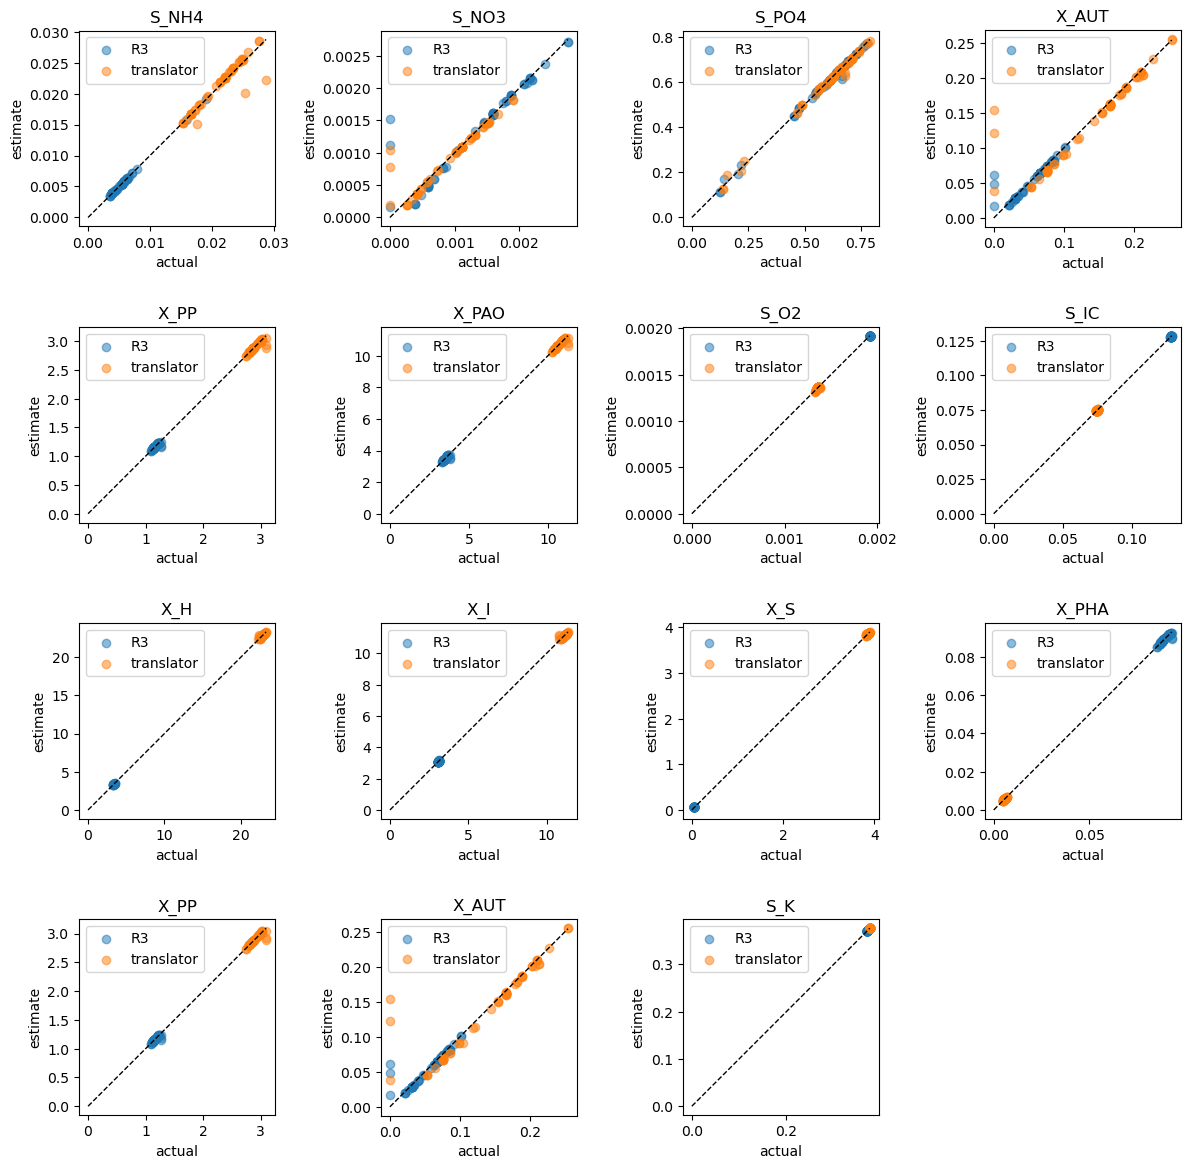

In [3]:
# plot parameters vs estimated values in subplots
params = ['S_NH4', 'S_NO3', 'S_PO4', 'X_AUT', 'X_PP', 'X_PAO', 'S_O2', 'S_IC', 'X_H', 'X_I', 'X_S', 'X_PHA', 'X_PP', 'X_AUT', 'S_K']
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.flatten()

for i, param in enumerate(params):
    if i < len(axes):
        ax = axes[i]
        ax.scatter(df_R3_with_est[param], df_R3_with_est[f'{param}_est'], label='R3', alpha=0.5)
        ax.scatter(df_translator_with_est[param], df_translator_with_est[f'{param}_est'], label='translator', alpha=0.5)
        max_val = max(df_R3_with_est[param].max(), df_translator_with_est[param].max())
        ax.plot([0, max_val], [0, max_val], color='black', linestyle='--', linewidth=1)
        ax.set_title(param)
        ax.set_xlabel('actual')
        ax.set_ylabel('estimate')
        ax.legend()
        ax.set_aspect('equal')

# Remove empty subplots
for i in range(len(params), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [4]:
# Print expected values for a test case
test_NH4_removal = 0.5
test_P_removal = 0.3
test_EI = 60.0

print("Expected values based on best fit equations OR keeping the original values:")
print("\nR3 values:")
for param in R3_coeffs:
    expected = base_values_R3[param] + \
               R3_coeffs[param]['NH4_removal'] * test_NH4_removal + \
               R3_coeffs[param]['P_removal'] * test_P_removal + \
               R3_coeffs[param]['EI'] * test_EI + \
               R3_coeffs[param]['NH4_removal^2'] * test_NH4_removal**2 + \
               R3_coeffs[param]['P_removal^2'] * test_P_removal**2 + \
               R3_coeffs[param]['EI^2'] * test_EI**2
    print(f"{param}: {expected:.6f}")

print("\nTranslator values:")
for param in translator_coeffs:
    expected = base_values_translator[param] + \
               translator_coeffs[param]['NH4_removal'] * test_NH4_removal + \
               translator_coeffs[param]['P_removal'] * test_P_removal + \
               translator_coeffs[param]['EI'] * test_EI + \
               translator_coeffs[param]['NH4_removal^2'] * test_NH4_removal**2 + \
               translator_coeffs[param]['P_removal^2'] * test_P_removal**2 + \
               translator_coeffs[param]['EI^2'] * test_EI**2
    print(f"{param}: {expected:.6f}")


Expected values based on best fit equations OR keeping the original values:

R3 values:
S_A: 0.000567
S_F: 0.000403
S_I: 0.057000
S_N2: 0.037999
S_NH4: 0.007500
S_NO3: 0.001589
S_O2: 0.001900
S_PO4: 0.531190
S_K: 0.370000
S_Mg: 0.020000
S_IC: 0.130000
X_AUT: 0.063949
X_H: 3.411363
X_I: 3.112057
X_PAO: 3.462274
X_PHA: 0.088670
X_PP: 1.154493
X_S: 0.056697

Translator values:
S_A: 0.096753
S_F: 0.147719
S_I: 0.057000
S_N2: 0.031496
S_NH4: 0.022550
S_NO3: 0.001094
S_O2: 0.001353
S_PO4: 0.544117
S_K: 0.380000
S_Mg: 0.024210
S_IC: 0.074390
X_AUT: 0.160351
X_H: 22.911014
X_I: 11.162651
X_PAO: 10.617880
X_PHA: 0.005472
X_PP: 2.873048
X_S: 3.871979


In [5]:
# r3 coeffs for S_O2
print(R3_coeffs['S_O2'])

{'NH4_removal': 0, 'P_removal': 0, 'EI': 0, 'NH4_removal^2': 0, 'P_removal^2': 0, 'EI^2': 0}


In [6]:
# R3 coeffs for X_K
print(R3_coeffs['S_K'])

{'NH4_removal': 0, 'P_removal': 0, 'EI': 0, 'NH4_removal^2': 0, 'P_removal^2': 0, 'EI^2': 0}
